In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

3.1 Data exploration and Transform

In [29]:
# Read .csv file
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
# df_wine.info()
print(df_wine)

     0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17

In [30]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']
df_wine


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [31]:
#Data Explore and Cleaning
# df_wine.Fillna()
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
# Split variables / output
X = df_wine.drop(columns =['Class label'])
Y = df_wine['Class label']

StandardScaler()
[1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]


<AxesSubplot:>

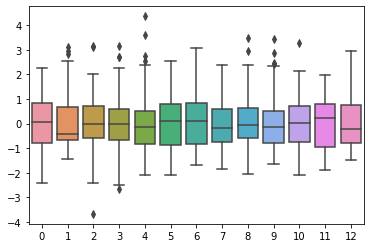

In [33]:
#Data Transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))

print(scaler.mean_)

X_standard = scaler.transform(X)
 
sns.boxplot(data=X_standard)



In [34]:
#Visualize Variable (scatter plot pairs of variables)
# sns.pairplot(df_wine, hue='Class label', size=2.5)

3.2 PCA of all variables

In [35]:
# PCA all variables (after standardized data)
pca = PCA()
X_pca = pca.fit_transform(X_standard)
print(len(X_pca))



178


Explained Variance ratio =  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


<BarContainer object of 13 artists>

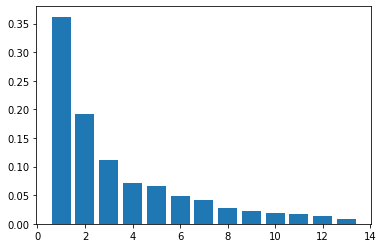

In [36]:
print('Explained Variance ratio = ', pca.explained_variance_ratio_)
# Visualize Explained Variance (eigenvalues)
plt.bar([i for i in range(1,14)],pca.explained_variance_ratio_)

In [37]:
print('Explained Variance (eigenvalues) = ', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca.components_[0:3,:])
print(len(pca.components_))

Explained Variance (eigenvalues) =  [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
--------------------------------------------
PCA components (eigenvectors) 
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]
13


3.2 PCA of 2 components

In [38]:
# PCA all variables (after standardized data)
pca2 = PCA(n_components=3)
X_pca_2 = pca2.fit_transform(X_standard)
print(X_pca_2)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00]
 [ 3.05025392e+00 -2.12240111e+00 -6.29395827e-01]
 [ 2.44908967e+00 -1.17485013e+00 -9.77094891e-01]
 [ 2.05943687e+00 -1.60896307e+00  1.46281883e-01]
 [ 2.51087430e+00 -9.18070957e-01 -1.77096903e+00]
 [ 2.75362819e+00 -7.89437674e-01 -9.84247490e-01]
 [ 3.47973668e+00 -1.30233324e+00 -4.22735217e-01]
 [ 1.75475290e+00 -6.11977229e-01 -1.19087832e+00]
 [ 2.11346234e+00 -6.75706339e-01 -8.65086426e-01]
 [ 3.45815682e+00 -1.13062988e+00 -1.20427635e+00]
 [ 4.31278391e+00 -2.09597558e+00 -1.26391275e+00]
 [ 2.30518820e+00 -1.66255173e+00  2.17902616e-01]
 [ 2.17195527e+00 -2.32730534e+00  8.31729866e-01]
 [ 1.89897118e+00 -1.63136888e+00  7.94913792e-01]
 [ 3.54198508e+00 -2.51834367e+00 -4.85458508e-01]
 [ 2.08452220e+00 -1.06113799e+

Explained Variance ratio =  [0.36198848 0.1920749  0.11123631]


<BarContainer object of 3 artists>

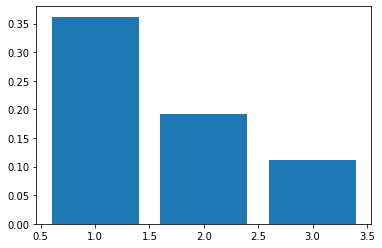

In [39]:
print('Explained Variance ratio = ', pca2.explained_variance_ratio_)
#  Visualize Explained Variance (eigenvalues)
plt.bar([i for i in range(1,4)],pca2.explained_variance_ratio_)

In [40]:
print('Explained Variance (eigenvalues) = ', pca2.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca2.components_[0:2,:])

Explained Variance (eigenvalues) =  [4.73243698 2.51108093 1.45424187]
--------------------------------------------
PCA components (eigenvectors) 
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


3.3 Kmean Clustering of All variables and Accuracy

In [41]:
# Kmean all variables
# Compute the n_clusters np.unique(Y)
kmeans = KMeans(n_clusters=len(np.unique(df_wine['Class label'])), random_state=0)
clusters = kmeans.fit_predict(X)
clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

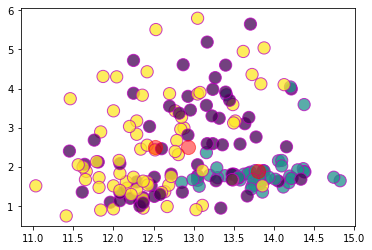

In [42]:
# Scatter Plot cluster center
# col_x , col_y เป็น column คู่ ใดๆ ใน X input variables
plt.scatter(X['Alcohol'], X['Malic acid'], c=clusters, edgecolors='m',alpha=0.75,s=150)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [43]:
# map clusters to real label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(Y[mask])[0]

In [44]:
df = pd.DataFrame(Y,labels)
df

,Class label
1,1
1,1
1,1
1,1
3,1
...,...
3,1
3,1
3,1
3,1


In [45]:
# Calculate Accuracy
accuracy_score(labels, Y)

0.702247191011236

3.3 Kmean Clustering of PCA and Accuracy

In [46]:
# Kmean all variables
# Compute the n_clusters np.unique(Y)
kmeans_PCA = KMeans(n_clusters=3, random_state=0)
clusters_PCA = kmeans_PCA.fit_predict(X_pca_2)

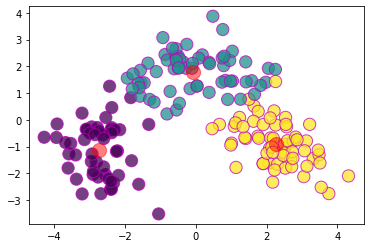

In [47]:
# Scatter Plot cluster center
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=clusters_PCA, edgecolors='m',alpha=0.75,s=150)
centers_pca = kmeans_PCA.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.5)

In [48]:
# map clusters to real label
Labels_pca = np.zeros_like(clusters_PCA)
for i in range(10):
    mask = (clusters_PCA == i)
    Labels_pca[mask] = mode(Y[mask])[0]

In [49]:
# Calculate Accuracy
accuracy_score(Labels_pca, Y)

0.9606741573033708